In [75]:
using StatGeochem
using Plots; gr();
using StatsBase
using Statistics

include("run_mcmc.jl")
include("../src/crustDistribution.jl")

Loading crust information from file ../data/crustDistribution.jld


Loading crust information from file ../data/crustDistribution.jld


getAllSeismic

In [2]:
## Get average seismic, depth, geotherm pairs

In [3]:
# 3 layers, 5 props / layer 
invert = fill(NaN, (3,5))

# Seismic 
for l in [6,7,8]
    s = mean(hcat(find_crust1_seismic(
                crustDistribution.all_lats, crustDistribution.all_longs, l)...), 
            Weights(crustDistribution.weights), dims=1)
    s[2] = s[1]/s[2]
    invert[l-5,3:5] .= s[:]
end

# Layers and geotherms 
d = mean(crustDistribution.depth, Weights(crustDistribution.weights), dims=1)
# Get middle of each layer
layers = d[2:end]
pushfirst!(layers, 0)
# Each sample is geotherm, layer depth
invert[:,1] .= d[1]
invert[:,2] .= [(layers[i]+layers[i+1])/2 for i in 1:3]

println(invert)

[41.678471017560426 6.909417469309636 6.095079345979234 1.7252766096948702 2728.7077338784757; 41.678471017560426 20.193064518935472 6.413912813979953 1.7366797024951082 2802.8213184333244; 41.678471017560426 32.32255339791592 6.911113915442597 1.75810779522217 2933.306619695041]


In [4]:
runner = MCMCRunner();

┌ Info: Initializing GMM, 11 Gaussians diag covariance 10 dimensions using 1000 data points
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:79


K-means converged with 29 iterations (objv = 25561.135415665784)


┌ Info: K-means with 1000 data points using 29 iterations
│ 8.3 data points per parameter
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:140
┌ Warning: Variances had to be floored 
│   ind = [6]
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:259
┌ Warning: Variances had to be floored 
│   ind = [6]
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:259
┌ Warning: Variances had to be floored 
│   ind = [6]
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:259
┌ Warning: Variances had to be floored 
│   ind = [6]
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:259
┌ Warning: Variances had to be floored 
│   ind = [6]
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:259
┌ Warning: Variances had to be floored 
│   ind = [6]
└ @ GaussianMixtures /Users/gailin/.juli

In [5]:
#s, a, l = run_mcmc(3, runner, DataSample(invert[2,:]...))

In [6]:
n = 200
samples = fill(NaN, (3,n,10))
accepted = fill(false, (3,n))
ll = fill(NaN, (3,n))
for i in 1:3
    s, a, l = run_mcmc(n, runner, DataSample(invert[i,:]...))
    samples[i,:,:] .= s
    accepted[i,:] .= a
    ll[i,:] .= l
end 

Comparing all to -22.983246919221305


Iterating... 25%|█████████▊                             |  ETA: 0:12:55



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 35%|█████████████▋                         |  ETA: 0:10:54



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 56%|█████████████████████▋                 |  ETA: 0:07:07



Cannot process sample due to 
 ArgumentError("cannot parse \"-62.21 142.1198\" as Float64")


Iterating... 76%|█████████████████████████████▌         |  ETA: 0:03:50



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 77%|██████████████████████████████         |  ETA: 0:03:35



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating...100%|███████████████████████████████████████| Time: 0:15:26




Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")
Comparing all to -23.926483726920644


Iterating... 94%|████████████████████████████████████▋  |  ETA: 0:00:59



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating...100%|███████████████████████████████████████| Time: 0:16:14


Comparing all to -25.07650340170562


Iterating...100%|███████████████████████████████████████| Time: 0:14:51


In [7]:
ign, h = readdlm("../data/remote/base_nobin/bsr_ignmajors_1.csv", ',', header=true)

([1.0 72.49576 … 30.97617 0.0; 2.0 64.22882 … 43.56536 0.0; … ; 99999.0 62.02645 … 34.27961 0.0; 100000.0 63.72973 … 40.9444 0.0], AbstractString["index" "SiO2" … "lower" "exhumed"])

In [54]:
stephist(ign[:,2], normalize=:pdf, label="Original", alpha=.5)
stephist!(samples[1,50:end,1], normalize=:pdf, label="Upper", alpha=.6, linewidth=2, linecolor=:orange, nbins=10)
histogram!(samples[1,50:end,1], normalize=:pdf, label=false, alpha=.1, linewidth=0, color=:orange,nbins=10)

stephist!(samples[2,50:end,1], normalize=:pdf, label="Middle", alpha=.6, linewidth=2,linecolor=:green, nbins=10)
histogram!(samples[2,50:end,1], normalize=:pdf, label=false, alpha=.1, linewidth=0, color=:green,nbins=10)

stephist!(samples[3,50:end,1], normalize=:pdf, label="Lower", alpha=.6, linewidth=2, linecolor=:purple, nbins=10)
histogram!(samples[3,50:end,1], normalize=:pdf, label=false, alpha=.1, linewidth=0, color=:purple,nbins=10)

#savefig("../../present/4_1/mcmc.pdf")

In [9]:
sum(isnan.(samples))/length(samples)

0.0

In [58]:
sum(accepted,dims=2)

3×1 Array{Int64,2}:
 74
 85
 99

In [11]:
plot()
for l in 1:3
    plot!(ll[l,:])
end

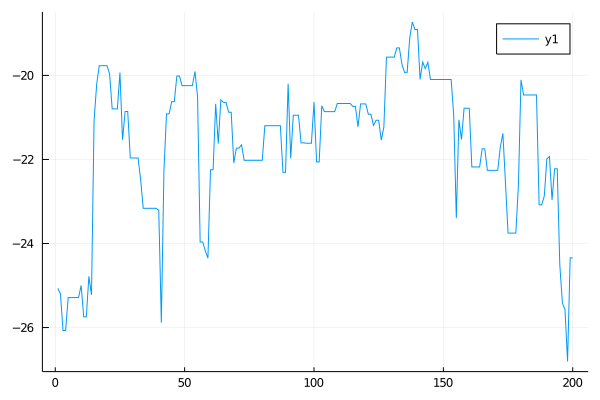

In [60]:
plot(ll[3,:])

In [61]:
samples[:,1,1]

3-element Array{Float64,1}:
 58.6791094474985
 58.9199185991341
 54.47929173272394

In [62]:
invert

3×5 Array{Float64,2}:
 41.6785   6.90942  6.09508  1.72528  2728.71
 41.6785  20.1931   6.41391  1.73668  2802.82
 41.6785  32.3226   6.91111  1.75811  2933.31

In [66]:
32*(550/41)

429.2682926829268

In [82]:
6.38+10e-4*4.422*909.4 - 10e-4*2.281*429

9.4228178

In [74]:
dat = getTestSeismic(10,8,0.0,["D95-44", "HT4", "D95-11"])

LoadError: [91mArgumentError: Cannot open 'data/kern_dabie_comp.csv': not a file[39m